In [1]:
import os
import sys
import shutil
import torch.nn as nn
import torch
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir))) # This is hellish, I am not sure why relative imports did not work
from modules.DCGAN import Generator
# Path to the folder you want to empty
model_path = r'..\saved_models\test\generator_normal.pth'
gen_data_save_location = r'..\Dataset\Generated\gen_normal.npy'
real_data_path = r'..\Dataset\Real\normal.npy'
num_samples_to_generate = 2000


In [2]:
generator = torch.load(model_path)

In [3]:
import numpy as np
import os

# Assuming generator is your trained generator model
# and latent_vector_size is the size of the noise input for the generator

# Number of samples to generate

# Generate random latent vectors
noise = torch.randn(num_samples_to_generate, 100, device="cuda")

# Generating new data
generator.eval()  # Switching the generator to evaluation mode

with torch.no_grad():  # No need to track gradients
    generated_data = generator(noise)
    # Reshaping to 19x500 right after generation
    generated_data = generated_data.view(num_samples_to_generate, 19, -1)

# Converting to numpy for saving and further processing
generated_data_np = generated_data.cpu().numpy()
if not os.path.exists(gen_data_save_location):
    os.makedirs(os.path.dirname(gen_data_save_location), exist_ok=True)

np.save(gen_data_save_location, generated_data_np)

c:\Users\wolve\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


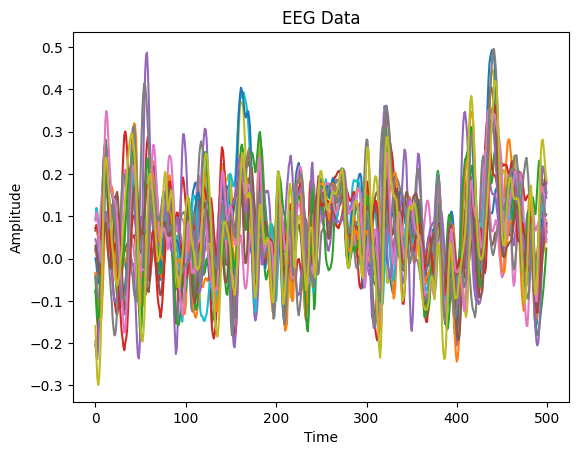

In [4]:
from random import randint
import matplotlib.pyplot as plt

# Assuming your EEG data is in a 2D array format where each row is a separate EEG channel
for channel_data in generated_data_np[randint(0, num_samples_to_generate-1)]:
    plt.plot(channel_data)  # Plot each channel

plt.title('EEG Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

In [5]:
data = np.load(real_data_path)
import matplotlib.pyplot as plt
from random import randint

# eeg_data = np.loadtxt(f'training_data/Patientdata_2sec/extracted_Pdata{randint(1,10)}_segment{randint(0, 9)}.dat')
eeg_data = data[randint(0, len(data)-1)]
# Assuming your EEG data is in a 2D array format where each row is a separate EEG channel
for channel_data in eeg_data:
    plt.plot(channel_data)  # Plot each channel

plt.title('EEG Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()


NameError: name 'folder_path' is not defined